# Credit Card Fraud Detection Capstone Project

## Business Overview
With the rise of digital payment channels, the number of fraudulent transactions is going very high day by day. It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. It is difficult to manually predict fraudulent transactions which is also error prone 

## Problem Statement 
Build machine learning models to predict fraudulent credit card transactions. So, the objective of this project is to accurately predict the fraudulent transactions and hence help the Organizations in reducing loss coz of fraudulent transactions

## Input Dataset
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent.  The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others

In [1]:
# Import packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


## Read the Data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
## Describe the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Exploratory Data Analysis

### Distribution of Classes: Fraudulent and Non-Fraudulent Transactions

In [ ]:
# Distribution of Classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Count of Positive Class (fraudulent): " + str(classes[0]))
print("Count of Negative Class (non-fraudulent): " + str(classes[1]))

print("Positive Class (fraudulent) % : " + str(round(fraud_share,3)))
print("Negative Class (non-fraudulent) %: " + str(round(normal_share,3)))

Count of Positive Class (fraudulent): 284315
Count of Negative Class (non-fraudulent): 492
Positive Class (fraudulent) % : 0.173
Negative Class (non-fraudulent) %: 99.827


In [ ]:
# Check the amount fraudulent transactions
df[df['Class']==1].Amount.sum()

60127.97

### Obseravations

- In the dataset, we can see 492 fraudulent transactions out of total 284807 transactions
- % of fraudulent transactions = 0.173% 
- Total amount of fraud in 2 days in euros: 60127.97

Text(0.5, 1.0, 'No. of fraudulent transactions vs non-fraudulent transactions')

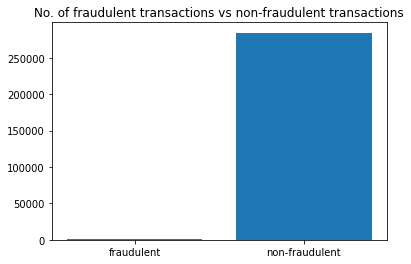

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
transactions=['fraudulent','non-fraudulent']
number=[classes[1], classes[0]]
percentage=[fraud_share, normal_share]
plt.bar(transactions, number)
plt.title('No. of fraudulent transactions vs non-fraudulent transactions')

Text(0.5, 1.0, '% of fraudulent transactions vs non-fraudulent transactions')

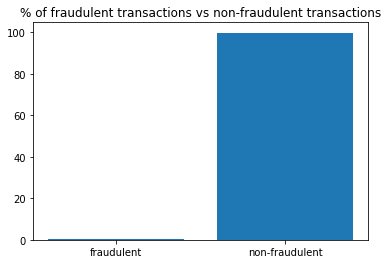

In [ ]:
plt.bar(transactions, percentage)
plt.title('% of fraudulent transactions vs non-fraudulent transactions')

### Distribution of Time

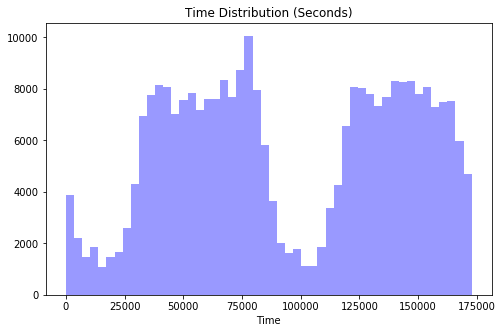

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8,5))
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], kde=False, color='blue')
plt.show()

### Observations

- The no.of transactions over time does not follow a strictly gaussian normal distribution
- Since its 2 days of data, its a repreated distribution

### Distribution of Amount

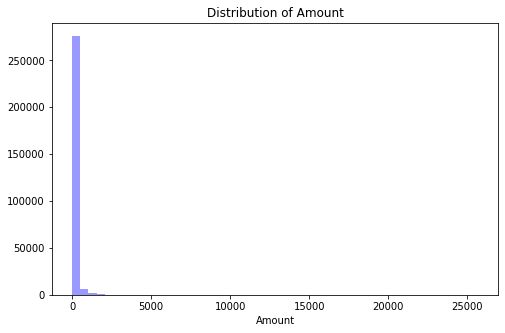

In [ ]:
#plot the amount feature
plt.figure(figsize=(8,5))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],kde=False, color='blue')

### Observations

- The amount of transaction most of the cases is low
- There are very less high valued tranasactions
- Better to check the distribution of classes over time and amount together

### Distribution of Time & Amount over the Classes

<Figure size 576x576 with 0 Axes>

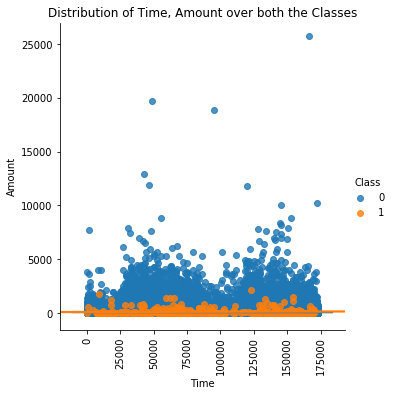

In [ ]:
plt.figure(figsize=(8,8))
sns.lmplot(x = "Time",y='Amount', hue = "Class", data = df)
plt.title('Distribution of Time, Amount over both the Classes')
plt.xticks(rotation=90)
plt.show()

### Observations:

- The distribution of fraudulent transactions is having less variation over Amount
- All the fraudulent have made transaction with the amount  range from 0-2500
- We can see there is more variation in Amount for normal(non fraudulent) transactions
- Both normal and fraud transactions are well distributed across the time

### Correlation matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

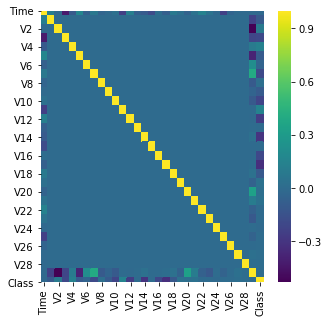

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap='viridis',annot=False)

### Insights

- In the above plot we are not spotting the correlation numbers because it would be very difficult to view the numbers.
- Just by looking at the plot, we can identify the correlations specified below
    - (Time, V3)  -> -0.42
    - (Amount, V2) -> -0.53
    - (Amount, V4) -> 0.4
- While these correlations are relatively high in comparison to the others, I didn’t feel that it was high enough to run the risk of multicollinearity.

### Drop unnecessary columns
- Time is not an useful feature for fraud detection. Hence drop it

In [4]:
# Drop unnecessary columns
data = df.drop(columns=['Time'])

### Splitting the data into train & test data
- Use Stratified train-test split to preserve the ratio of the classes

In [5]:
data = data.drop(columns=['Class'])
answer = df['Class']

In [6]:
# Split data into train and test in 80:20 ratio using stratified train-test split
xtrain,xtest,ytrain,ytest=train_test_split(data,answer,test_size=0.2,random_state=42, stratify=answer)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [7]:
print(np.sum(answer))
print(np.sum(ytrain))
print(np.sum(ytest))

492
394
98


Out of 492 fraudulent transactions in the dataset:
- No. of fraudulent transactions in training set = 394
- No. of fraudulent transactions in test set = 98
<br>
<br>
Thus the ratio of fraudent to non-fraudulent transactions are preserved after the splitting of data by using the <b>Stratified train-test split</b>

### The distribution of variables in the dataset

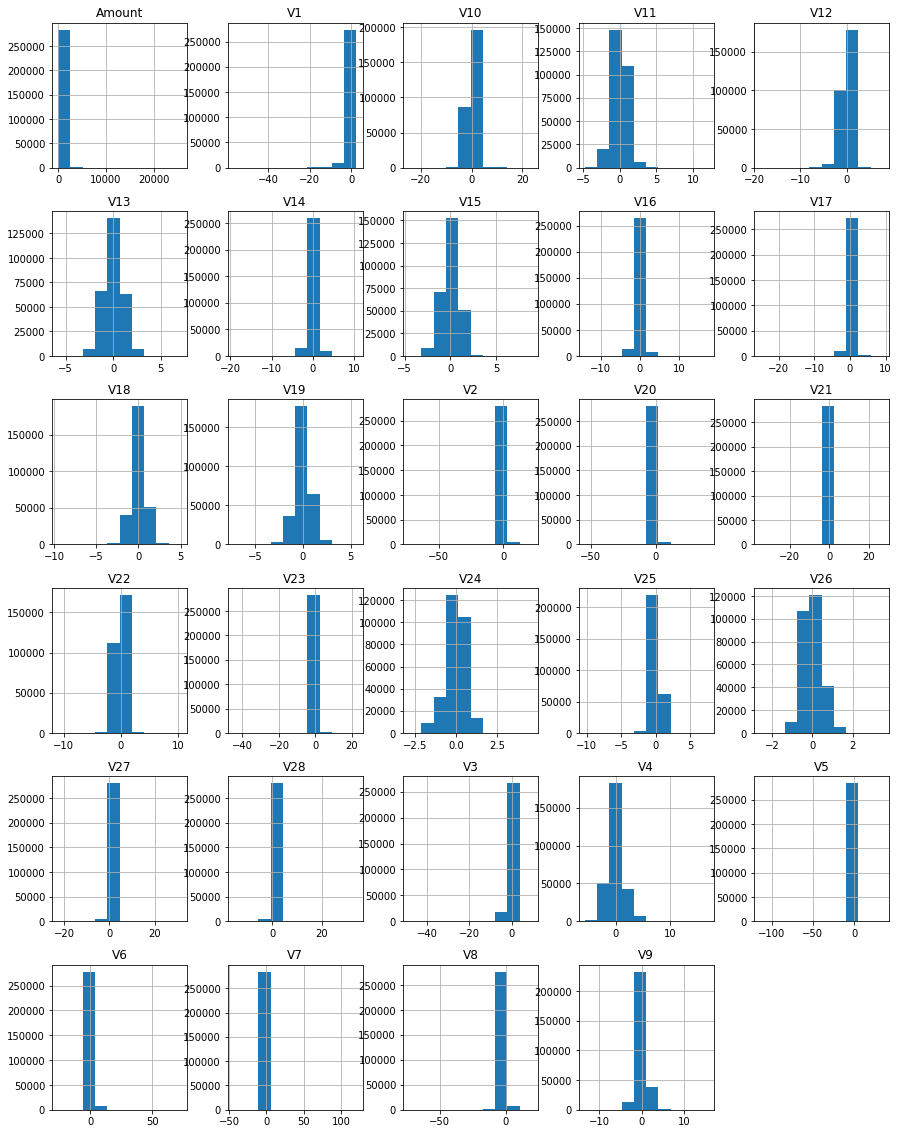

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

### Remove Skewness in the Distribution:
- Use <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [10]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()
pt.fit(xtrain)                       ## Fit the PT on training data
X_train_pt = pt.transform(xtrain)    ## Then apply on all data
X_test_pt = pt.transform(xtest)

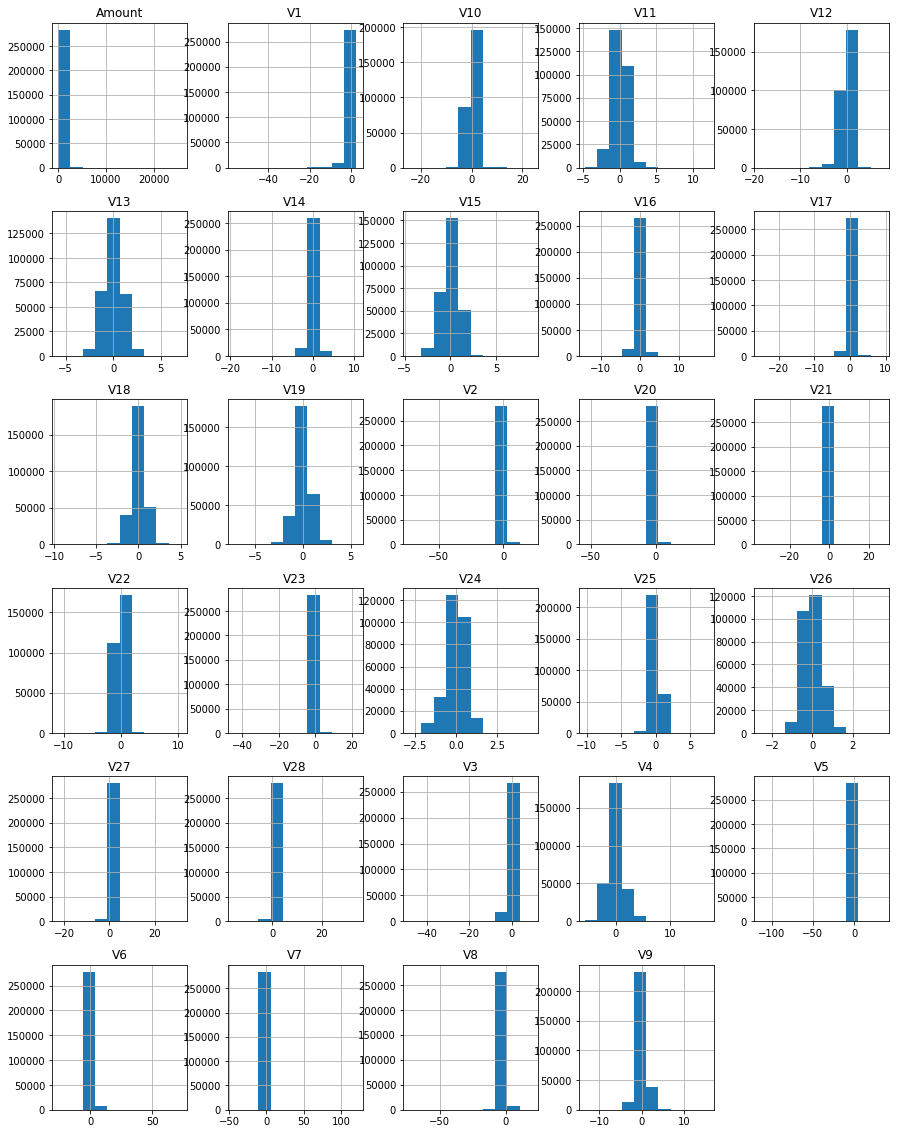

In [ ]:
# plot the histogram of variables from the dataset again to see the change
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

### Obserations:
- After Power Transformation, the features tend to follow the gaussian distribution

## Model Building
Build different models on:
- The imbalanced dataset(with and without transformation)
- Hyperparameter Tuning
- Class balancing techniques

In [21]:
def Model_Building(name,model,x_train,x_test):   
    print('###'*30)
    model.fit(x_train,ytrain)
    #training_score = cross_val_score(model,x_train,ytrain,cv=5)
    #print('Training Accuracy Score of {} is {}'.format(name,round(training_score.mean()*100,2)))
    training_pred = cross_val_predict(model,x_train,ytrain,cv=5)
    print('ROC AUC Training Score for {} is {}'.format(name,round(roc_auc_score(ytrain,training_pred)*100,2)))
    print('Recall Score: {:.2f}'.format(recall_score(ytrain,training_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(ytrain,training_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(ytrain,training_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(ytrain,training_pred)))
    print('---'*30)
    #test_score = cross_val_score(model,x_test,ytest,cv=5)
    #print('Test Accuracy Score of {} is {}'.format(name,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(model,x_test,ytest,cv=5)
    print('ROC AUC Testing Score for {} is {}'.format(name,round(roc_auc_score(ytest,test_pred)*100,2)))
    print('Recall Score: {:.2f}'.format(recall_score(ytest,test_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(ytest,test_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(ytest,test_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(ytest,test_pred)))
    print('###'*30)

### Model Evaluation Metrics
A <b>confusion matrix</b> is a table which describe the performance of a classification model (or "classifier") on a set of test data for which the actual values are known

Here is a representation of the confusion matrix:

<P>

            Actual  Predicted
                    No           Yes  
            No      TN           FP

            Yes     FN           TP
</p>

- <b>TN (True Negative): </b> The dependant variable is negative in the dataset and the model also predicted it as negative
- <b>FP (False Positive): </b> The dependant variable is negative in the dataset, but the model predicted it as positive
- <b>FN (False Negative): </b> The dependant variable is positive in the dataset, but the model predicted it as negative
- <b>TP (True Positive): </b> The dependant variable is positive in the dataset and the model also predicted it as positive


#### Accuracy
- Its the measure of the correctness of the predictions 
- No. of correctpredictions / Total no. of predictions
- Accuracy = (TP+TN)/(TP+FP+TN+FN)

#### Precision
- Ratio of correctly predicted positive to the total predicted positive
- Precision = TP / (TP+FP)
- Its measure of correctness of positive predictions

#### Recall
- Ratio of correctly predicted postives to the total number of actual positives as in the dataset
- Recall =TP/(TP + FN)
- It measures the portion of the positives being correctly predicted

#### F1-score
- Its a measure of the weighted average of Precision and Recall
- F1-score = (2 * Precision * Recall) / (Precision + Recall)

#### ROC AUC score
- Its a measure of treade off between the True Positive Rate (TPR) and True & False Positive Rate (FPR)
- TPR defines how many correct positive results occur among all positive samples available during the test. 
- FPR defines how many incorrect positive results occur among all negative samples available during the test
- True Positives are Benefits, while False Positives are Costs
- So, its important to balance between the benefit and cost

### Imbalanced Raw Dataset
- Build Models with the Raw Data: Logistic Regression, KNN, Decision Tree and XGBoost

In [ ]:
# Logistic Regression
Model_Building('Logistic Regression',LogisticRegression(),xtrain,xtest)

##########################################################################################
ROC AUC Training Score for Logistic Regression is 80.96
Recall Score: 0.62
Precision Score: 0.88
F1 Score: 0.73
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for Logistic Regression is 79.07
Recall Score: 0.58
Precision Score: 0.85
F1 Score: 0.69
Accuracy Score: 1.00
##########################################################################################


In [ ]:
# KNN
Model_Building('KNN',KNeighborsClassifier(),xtrain,xtest)

##########################################################################################
Training Accuracy Score of KNN is 99.92
ROC AUC Training Score for KNN is 81.72
Recall Score: 0.63
Precision Score: 0.90
F1 Score: 0.74
------------------------------------------------------------------------------------------
Test Accuracy Score of KNN is 99.89
ROC AUC Testing Score for KNN is 72.44
Recall Score: 0.45
Precision Score: 0.88
F1 Score: 0.59
##########################################################################################


In [ ]:
#Model_Building('SVC',SVC(),xtrain,xtest)
# Decision Tree
Model_Building('Decision Tree',DecisionTreeClassifier(),xtrain,xtest)

##########################################################################################
ROC AUC Training Score for Decision Tree is 88.56
Recall Score: 0.77
Precision Score: 0.77
F1 Score: 0.77
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for Decision Tree is 84.67
Recall Score: 0.69
Precision Score: 0.76
F1 Score: 0.72
Accuracy Score: 1.00
##########################################################################################


In [ ]:
# XGBoost Classifier
Model_Building('XGBoost Classifier',XGBClassifier(),xtrain,xtest)

##########################################################################################
ROC AUC Training Score for XGBoost Classifier is 88.95
Recall Score: 0.78
Precision Score: 0.92
F1 Score: 0.84
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for XGBoost Classifier is 88.26
Recall Score: 0.77
Precision Score: 0.90
F1 Score: 0.83
Accuracy Score: 1.00
##########################################################################################


<style>
table {
  border-collapse: collapse;
}

table, td, th {
  border: 1px solid black;
}
</style>
</head>
<body>

<h3>Model Evaluation Metrics on Imbalanced Raw Data</h3>

<table width=100%>
  <tr align="left">
    <th>Model Name</th>
    <th>Accuracy</th>
    <th>Precision </th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>ROC AUC Score</th>
  </tr>
  <tr>
    <td>Logistic Regression </td><td>1.0</td><td>0.85</td> <td>0.58</td><td>0.69</td> <td>0.79</td> 
  </tr>
  <tr>
    <td>KNN</td> <td>1.0</td> <td>0.88</td> <td>0.45</td> <td>0.59</td> <td>0.72</td> 
  </tr>
  <tr>
    <td>Decision Tree</td> <td>1.0</td> <td>0.76</td> <td>0.69</td> <td>0.72</td> <td>0.85</td> 
  </tr>
  <tr>
    <td>XGBoost</td> <td>1.0</td> <td>0.90</td> <td>0.77</td> <td>0.83</td> <td>0.88</td> 
  </tr>
 </table>

### Observations and Conclusions:
- The accuracy of all the models are 1.0 as the data is highly imbalanced. The no. of fraudelent tarnsactiosn are very less incompare to the non fraudulent transactions. Even though the fraudulent transactions are not well predicted, the accuracy is not impacted much. <b>So let's not consider accuracy as a metrics for the model selection </b>
- The other metrics: precision, recall, f1 score and roc auc score are the true reflection of the quality of the models
- The quality of the models are as follows based on the roc auc score:
<br>
<br>
<i> <b>XGBoost > Decision Tree > Logistic Regression > KNN </b> </I>

###  Imbalanced Data with Transformation
- Build models with raw data after Power Transformation: Logistic Regression, KNN, Decision Tree and XGBoost

In [22]:
# Logistic Regression
Model_Building('Logistic Regression',LogisticRegression(),X_train_pt,X_test_pt)

##########################################################################################
ROC AUC Training Score for Logistic Regression is 82.35
Recall Score: 0.65
Precision Score: 0.89
F1 Score: 0.75
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for Logistic Regression is 78.05
Recall Score: 0.56
Precision Score: 0.83
F1 Score: 0.67
Accuracy Score: 1.00
##########################################################################################


In [ ]:
# KNN
Model_Building('KNN',KNeighborsClassifier(),X_train_pt,X_test_pt)

##########################################################################################
ROC AUC Training Score for KNN is 86.67
Recall Score: 0.73
Precision Score: 0.91
F1 Score: 0.81
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for KNN is 85.19
Recall Score: 0.70
Precision Score: 0.82
F1 Score: 0.76
Accuracy Score: 1.00
##########################################################################################


In [ ]:
# SVC
#Model_Building('SVC',SVC(),X_train_pt,X_test_pt)
# Decision Tree
Model_Building('Decision Tree',DecisionTreeClassifier(),X_train_pt,X_test_pt)

##########################################################################################
ROC AUC Training Score for Decision Tree is 88.3
Recall Score: 0.77
Precision Score: 0.75
F1 Score: 0.76
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for Decision Tree is 84.67
Recall Score: 0.69
Precision Score: 0.71
F1 Score: 0.70
Accuracy Score: 1.00
##########################################################################################


In [ ]:
# XGBoost Classifier
Model_Building('XGBoost Classifier',XGBClassifier(),X_train_pt,X_test_pt)

##########################################################################################
ROC AUC Training Score for XGBoost Classifier is 88.19
Recall Score: 0.76
Precision Score: 0.92
F1 Score: 0.83
Accuracy Score: 1.00
------------------------------------------------------------------------------------------
ROC AUC Testing Score for XGBoost Classifier is 88.26
Recall Score: 0.77
Precision Score: 0.90
F1 Score: 0.83
Accuracy Score: 1.00
##########################################################################################


<style>
table {
  border-collapse: collapse;
}

table, td, th {
  border: 1px solid black;
}
</style>
</head>
<body>

<h3>Model Evaluation Metrics for Class Imbalanced Data with Transformation</h3>

<table width=100%>
  <tr align="left">
    <th>Model Name</th>
    <th>Accuracy</th>
    <th>Precision </th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>ROC AUC Score</th>
  </tr>
  <tr>
    <td>Logistic Regression </td><td>1.0</td><td>0.83</td> <td>0.56</td><td>0.67</td> <td>0.78</td> 
  </tr>
  <tr>
    <td>KNN</td> <td>1.0</td> <td>0.82</td> <td>0.70</td> <td>0.76</td> <td>0.85</td> 
  </tr>
  <tr>
    <td>Decision Tree</td> <td>1.0</td> <td>0.71</td> <td>0.69</td> <td>0.70</td> <td>0.85</td> 
  </tr>
  <tr>
    <td>XGBoost</td> <td>1.0</td> <td>0.90</td> <td>0.77</td> <td>0.83</td> <td>0.88</td> 
  </tr>
 </table>

### Insights: 
- The over all metrics of the models have not changed much with the transformation of the raw data as original dataset contains the principal components obtained using PCA
- In fact, the metrics: precison, recall, f1 score and roc auc score for XGBoost model remains the same as in the raw data without transformation
- The order of performance of models on the basis of ROC AUC score are as follows:

     <i> XGBoost > Decision Tree = KNN > Logistic Regression </i>


### Hyper Parameter Tunning 

In [11]:
def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(xtrain, ytrain)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))
    return best_param

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": [2,3,4], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#svc_params = {'C': [0.5, 0.7, 0.9], 'kernel': ['poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

def HyperParameter_Tunning(model,reg_params,x_train,x_test,y_train,y_test): 
  ## search for the fine tune over Logistic Regression Model
  print('###'*30)
  print()
  if 'XGBClassifier'==model.__class__.__name__:
    best_param = RandomizedSearchCV(model, param_distributions=params,scoring='roc_auc', cv=3, verbose=2,n_jobs=-1, random_state=10)
  else:
    best_param = grid_search(model,reg_params)
  best_param.fit(x_train,y_train)

  log_reg_pred = cross_val_predict(best_param, x_test, y_test, cv=5)

  from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
  y_pred = best_param.predict(x_test)

  print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
  print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
  print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
  print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
  print('ROC AUC Testing Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
  print('###'*30)

### Model Building with Hyperparameter Tunning
- Logistic Regression, KNN, Decision Tree and XGBoost

In [ ]:
# LogisticRegression
HyperParameter_Tunning(LogisticRegression(),log_reg_params,X_train_pt,X_test_pt,ytrain,ytest)

##########################################################################################

LogisticRegression algorithm best parameter are : LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Recall Score: 0.62
Precision Score: 0.87
F1 Score: 0.73
Accuracy Score: 1.00
ROC AUC Testing Score: 0.81
##########################################################################################


In [ ]:
# KNeighborsClassifier
HyperParameter_Tunning(KNeighborsClassifier(),knears_params,X_train_pt,X_test_pt,ytrain,ytest)

##########################################################################################

KNeighborsClassifier algorithm best parameter are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Recall Score: 0.81
Precision Score: 0.93
F1 Score: 0.86
Accuracy Score: 1.00
ROC AUC Testing Score: 0.90
##########################################################################################


In [ ]:
#HyperParameter_Tunning(SVC(),svc_params,X_train_pt,X_test_pt,ytrain,ytest)
# DecisionTreeClassifier
HyperParameter_Tunning(DecisionTreeClassifier(),tree_params,X_train_pt,X_test_pt,ytrain,ytest)

##########################################################################################

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Recall Score: 0.79
Precision Score: 0.87
F1 Score: 0.82
Accuracy Score: 1.00
ROC AUC Testing Score: 0.89
##########################################################################################


In [ ]:
params = { 'min_child_weight': [0.5, 1, 2],'gamma': [1, 1.5, 2, 5],'subsample': [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'scale_pos_weight':[10, 100, 300] }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=500,objective='binary:logistic',
                    verbosity=2, nthread=-1)
HyperParameter_Tunning(xgb,params,X_train_pt,X_test_pt,ytrain,ytest)


##########################################################################################

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 87.7min finished


[09:30:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:30:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:30:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:30:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:30:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:30:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[09:30:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[09:30:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.7min finished


[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=5
[09:44:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nod

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.2min finished


[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[09:55:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.1min finished


[10:07:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:07:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:07:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:07:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:07:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:07:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:07:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:07:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.9min finished


[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:18:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra node

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.3min finished


[10:30:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[10:30:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[10:30:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[10:30:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[10:30:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[10:30:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[10:30:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[10:30:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nod

<style>
table {
  border-collapse: collapse;
}

table, td, th {
  border: 1px solid black;
}
</style>
</head>
<body>

<h3>Model Evaluation Metrics for Class Imbalanced Data with Model Hyperparamater Tuning</h3>

<table width=100%>
  <tr align="left">
    <th>Model Name</th>
    <th>Precision </th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>ROC AUC Score</th>
  </tr>
  <tr>
    <td>Logistic Regression </td><td>0.87</td> <td>0.62</td><td>0.73</td> <td>0.81</td> 
  </tr>
  <tr>
    <td>KNN</td>  <td>0.93</td> <td>0.81</td> <td>0.86</td> <td>0.90</td> 
  </tr>
  <tr>
    <td>Decision Tree</td> <td>0.87</td> <td>0.79</td> <td>0.82</td> <td>0.89</td> 
  </tr>
  <tr>
    <td>XGBoost</td>  <td>0.87</td> <td>0.79</td> <td>0.82</td> <td>0.89</td> 
  </tr>
 </table>


### Insights:

- With the hyperparameter tuning, all the models have performed better 
- There is a significant improvement in the performance of the KNN model with a roc auc score of 0.90
- Its intesreting to note, with hyper parameter tuning Decision Treee performs as par the XGBoost model
- The performance of models as per the roc auc score are as follows:

    <i> KNN > XGBoost= Decision Treee > Logistic Regression</i>

### Model Building with Balanced Class Data

##### Perform class balancing with the following techniques:
- Random Oversampling
- SMOTE
- ADASYN

### Random Over Sampling

In [12]:
# Balance Data using Random Over Sampling 
X_train_pt_over, ytrain_over = RandomOverSampler(random_state=42).fit_sample(X_train_pt,ytrain)
X_test_pt_over, ytest_over = RandomOverSampler(random_state=42).fit_sample(X_test_pt,ytest)

In [ ]:
# Logistic Regression
HyperParameter_Tunning(LogisticRegression(),log_reg_params,X_train_pt_over,X_test_pt_over,ytrain_over,ytest_over)

##########################################################################################

LogisticRegression algorithm best parameter are : LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.94
ROC AUC Testing Score: 0.94
##########################################################################################


In [ ]:
# KNeighbors Classifier
HyperParameter_Tunning(KNeighborsClassifier(),knears_params,X_train_pt_over,X_test_pt_over,ytrain_over,ytest_over)

##########################################################################################

KNeighborsClassifier algorithm best parameter are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Recall Score: 0.86
Precision Score: 1.00
F1 Score: 0.92
Accuracy Score: 0.93
ROC AUC Testing Score: 0.93
##########################################################################################


In [ ]:
# DecisionTree Classifier
HyperParameter_Tunning(DecisionTreeClassifier(),tree_params,X_train_pt_over,X_test_pt_over,ytrain_over,ytest_over)

##########################################################################################

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Recall Score: 0.89
Precision Score: 0.95
F1 Score: 0.92
Accuracy Score: 0.92
ROC AUC Testing Score: 0.92
##########################################################################################


In [13]:
# XGBoost
params = { 'min_child_weight': [0.5, 1, 2],'gamma': [1, 1.5, 2, 5],'subsample': [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'scale_pos_weight':[10, 100, 300] }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=500,objective='binary:logistic',
                    verbosity=2, nthread=-1)
HyperParameter_Tunning(xgb,params,X_train_pt,X_test_pt,ytrain,ytest)

##########################################################################################

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 13.4min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.8min finished


[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:38] INFO: src/tree/updater_prune.cc:74: tree prun

[13:25:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:43] INFO: src/tree/updater_prune.cc:74: tree prun

[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:47] INFO: src/tree/updater_prune.cc:74: tree prun

[13:25:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[13:25:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:25:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13:25:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:25:52] INFO: src/tree/updater_prune.cc:74: tree pruni

[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:25:57] INFO: src/tree/updater_prune.cc:74: tree prun

[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:01] INFO: src/tree/updater_prune.cc:74: tree pruni

[13:26:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:26:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.2min remaining:   40.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:28:39] INFO: src/tree/updater_prune.cc:74: tree prun

[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=7
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=7
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=7
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=6
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=6
[13:28:43] INFO: src/tree/updater_prune.cc:74: tree prun

[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 6 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=7
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 8 pruned nodes, max_depth=6
[13:28:45] INFO: src/tree/updater_prune.cc:74: tree prun

[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 10 pruned nodes, max_depth=6
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=7
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=7
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=7
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=7
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 10 pruned nodes, max_depth=6
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=7
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=6
[13:28:47] INFO: src/tree/updater_prune.cc:74: tree p

[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=5
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=5
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=5
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=5
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 20 pruned nodes, max_depth=3
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 16 pruned nodes, max_depth=5
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=6
[13:28:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=6
[13:28:49] INFO: src/tree/updater_prune.cc:74: tre

[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=3
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=3
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=5
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=5
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 22 pruned nodes, max_depth=4
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 16 pruned nodes, max_depth=5
[13:28:50] INFO: src/tree/updater_prune.cc:74: tre

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.1min remaining:   37.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished


[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=7
[13:31:13] INFO: src/tree/updater_prune.cc:74: tree prun

[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=7
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=6
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[13:31:15] INFO: src/tree/updater_prune.cc:74: tree prun

[13:31:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=7
[13:31:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=6
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=6
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=7
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=5
[13:31:17] INFO: src/tree/updater_prune.cc:74: tree prun

[13:31:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=6
[13:31:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=7
[13:31:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=7
[13:31:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[13:31:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=7
[13:31:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=7
[13:31:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=7
[13:31:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=7
[13:31:19] INFO: src/tree/updater_prune.cc:74: tree prun

[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=5
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 6 pruned nodes, max_depth=4
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=5
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=3
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=4
[13:31:23] INFO: src/tree/updater_prune.cc:74: tree 

[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 12 pruned nodes, max_depth=2
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 12 pruned nodes, max_depth=3
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=3
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 14 pruned nodes, max_depth=2
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[13:31:25] INFO: src/tree/updater_prune.cc:74: tree prunin

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.9min remaining:   53.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.3min finished


[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:34:44] INFO: src/tree/updater_prune.cc:74: tree prun

[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=6
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=6
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=6
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=5
[13:34:46] INFO: src/tree/updater_prune.cc:74: tree prun

[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=7
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=6
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=7
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=6
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=6
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:34:47] INFO: src/tree/updater_prune.cc:74: tree prun

[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[13:34:49] INFO: src/tree/updater_prune.cc:74: tree prun

[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=5
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=6
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=7
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=7
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=7
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=5
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=7
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13:34:50] INFO: src/tree/updater_prune.cc:74: tree pr

[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=6
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=5
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=7
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=5
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[13:34:51] INFO: src/tree/updater_prune.cc:74: tree 

[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=3
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=3
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 12 pruned nodes, max_depth=3
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=7
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=3
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=6
[13:34:53] INFO: src/tree/updater_prune.cc:74: tree pru

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.5min remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


[13:37:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[13:37:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:37:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[13:37:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[13:37:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:37:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:37:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[13:37:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:37:49] INFO: src/tree/updater_prune.cc:74: tree prun

[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=7
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=7
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[13:37:50] INFO: src/tree/updater_prune.cc:74: tree prun

[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=7
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=6
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=7
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=5
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=7
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[13:37:52] INFO: src/tree/updater_prune.cc:74: tree prun

[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[13:37:54] INFO: src/tree/updater_prune.cc:74: tree prun

[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=5
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=5
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 8 pruned nodes, max_depth=7
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=6
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=6
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=7
[13:37:56] INFO: src/tree/updater_prune.cc:74: tree prun

[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=4
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=6
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=5
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=6
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=6
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=6
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=5
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=7
[13:37:58] INFO: src/tree/updater_prune.cc:74: tree p

[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 14 pruned nodes, max_depth=3
[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=4
[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 4 pruned nodes, max_depth=4
[13:38:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=6
[13:38:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[13:38:01] INFO: src/tree/updater_prune.cc:74: tree p

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.5min remaining:   46.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:52] INFO: src/tree/updater_prune.cc:74: tree prun

[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[13:40:53] INFO: src/tree/updater_prune.cc:74: tree prun

[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:54] INFO: src/tree/updater_prune.cc:74: tree pruning 

[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning 

[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:56] INFO: src/tree/updater_prune.cc:74: tree pruning 

[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[13:40:57] INFO: src/tree/updater_prune.cc:74: tree prunin

[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:40:58] INFO: src/tree/updater_prune.cc:74: tree pruning

<style>
table {
  border-collapse: collapse;
}

table, td, th {
  border: 1px solid black;
}
</style>
</head>
<body>

<h3>Model Evaluation Metrics for Class Balanced Data using Random Over Sampling</h3>

<table width=100%>
  <tr align="left">
    <th>Model Name</th>
    <th>Precision </th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>ROC AUC Score</th>
  </tr>
  <tr>
    <td>Logistic Regression </td><td>0.97</td> <td>0.92</td><td>0.94</td> <td>0.94</td> 
  </tr>
  <tr>
    <td>KNN</td>  <td>1.00</td> <td>0.86</td> <td>0.92</td> <td>0.93</td> 
  </tr>
  <tr>
    <td>Decision Tree</td> <td>0.95</td> <td>0.89</td> <td>0.92</td> <td>0.92</td> 
  </tr>
  <tr>
    <td>XGBoost</td>  <td>0.34</td> <td>0.89</td> <td>0.49</td> <td>0.94</td> 
  </tr>
 </table>


### Insights:

- With the balanced data using Random Over Sampling, all the models have performed better 
- There is a significant improvement in the performance of the Logistic Regression model with a roc auc score reaching 0.94 from 0.81
- The performance of models as per the roc auc score are as follows:

    <i> <b>XGBoost = Logistic Regression > KNN > Decision Treee  </b></i>
<br></br>
<br></br>   
- Though XGBoost has a good roc auc score, the precision is very poor coz of more false positives in the prediction. It may be coz of the random sampling

### SMOTE
- Balance data using Over Sampling Technique - SMOTE
- Build Models: Linear Regression, KNN, Decision Tree and XGBoost

In [16]:
from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, ytrain)
X_test_smote, y_test_smote = sm.fit_resample(X_test_pt, ytest)

In [ ]:
# LogisticRegression
HyperParameter_Tunning(LogisticRegression(),log_reg_params,X_train_smote,X_test_smote,y_train_smote,y_test_smote)

##########################################################################################

LogisticRegression algorithm best parameter are : LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.94
ROC AUC Testing Score: 0.94
##########################################################################################


In [25]:
# KNeighbors Classifier
HyperParameter_Tunning(KNeighborsClassifier(),knears_params,X_train_smote,X_test_smote,y_train_smote,y_test_smote)

##########################################################################################

KNeighborsClassifier algorithm best parameter are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Recall Score: 0.89
Precision Score: 1.00
F1 Score: 0.94
Accuracy Score: 0.94
ROC AUC Testing Score: 0.94
##########################################################################################


In [ ]:
# DecisionTree Classifier
HyperParameter_Tunning(DecisionTreeClassifier(),tree_params,X_train_smote,X_test_smote,y_train_smote,y_test_smote)

##########################################################################################

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Recall Score: 0.89
Precision Score: 0.96
F1 Score: 0.92
Accuracy Score: 0.93
ROC AUC Testing Score: 0.93
##########################################################################################


In [17]:
# XGB Classifier
HyperParameter_Tunning(xgb,params,X_train_smote,X_test_smote,y_train_smote,y_test_smote)

##########################################################################################

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 29.5min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.6min finished


[14:30:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[14:30:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[14:30:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[14:30:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[14:30:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[14:30:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 4 pruned nodes, max_depth=7
[14:30:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 4 pruned nodes, max_depth=7
[14:30:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[14:30:40] INFO: src/tree/updater_prune.cc:74: tree prun

[14:31:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 16 pruned nodes, max_depth=7
[14:31:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 10 pruned nodes, max_depth=7
[14:31:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 10 pruned nodes, max_depth=7
[14:31:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 6 pruned nodes, max_depth=7
[14:31:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 10 pruned nodes, max_depth=7
[14:31:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 2 pruned nodes, max_depth=7
[14:31:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 4 pruned nodes, max_depth=7
[14:31:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 6 pruned nodes, max_depth=7
[14:31:08] INFO: src/tree/updater_prune.cc:7

[14:31:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 6 pruned nodes, max_depth=7
[14:31:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 4 pruned nodes, max_depth=7
[14:31:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 4 pruned nodes, max_depth=7
[14:31:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 12 pruned nodes, max_depth=7
[14:31:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 8 pruned nodes, max_depth=7
[14:31:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 6 pruned nodes, max_depth=7
[14:31:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 20 pruned nodes, max_depth=7
[14:31:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 6 pruned nodes, max_depth=7
[14:31:33] INFO: src/tree/updater_prune.cc:74:

[14:31:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 12 pruned nodes, max_depth=7
[14:31:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 8 pruned nodes, max_depth=7
[14:31:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 6 pruned nodes, max_depth=7
[14:31:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 14 pruned nodes, max_depth=7
[14:31:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 14 pruned nodes, max_depth=7
[14:31:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 4 pruned nodes, max_depth=7
[14:31:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 4 pruned nodes, max_depth=7
[14:31:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 16 pruned nodes, max_depth=7
[14:31:58] INFO: src/tree/updater_prune.cc:7

[14:32:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 12 pruned nodes, max_depth=7
[14:32:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 6 pruned nodes, max_depth=7
[14:32:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 6 pruned nodes, max_depth=7
[14:32:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 2 pruned nodes, max_depth=7
[14:32:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 14 pruned nodes, max_depth=7
[14:32:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 6 pruned nodes, max_depth=7
[14:32:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 10 pruned nodes, max_depth=7
[14:32:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 6 pruned nodes, max_depth=7
[14:32:29] INFO: src/tree/updater_prune.cc:74

[14:32:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 12 pruned nodes, max_depth=7
[14:32:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 12 pruned nodes, max_depth=7
[14:32:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 22 pruned nodes, max_depth=7
[14:32:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 10 pruned nodes, max_depth=7
[14:32:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 10 pruned nodes, max_depth=7
[14:32:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 10 pruned nodes, max_depth=7
[14:32:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 20 pruned nodes, max_depth=7
[14:32:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 20 pruned nodes, max_depth=7
[14:32:53] INFO: src/tree/updater_prune.cc:

[14:33:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 22 pruned nodes, max_depth=7
[14:33:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 10 pruned nodes, max_depth=7
[14:33:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 12 pruned nodes, max_depth=7
[14:33:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 16 pruned nodes, max_depth=7
[14:33:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 4 pruned nodes, max_depth=7
[14:33:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 24 pruned nodes, max_depth=7
[14:33:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 18 pruned nodes, max_depth=7
[14:33:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 24 pruned nodes, max_depth=7
[14:33:19] INFO: src/tree/updater_prune.cc:

[14:33:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 18 pruned nodes, max_depth=7
[14:33:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 10 pruned nodes, max_depth=7
[14:33:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 8 pruned nodes, max_depth=7
[14:33:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 24 pruned nodes, max_depth=7
[14:33:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 18 pruned nodes, max_depth=7
[14:33:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 20 pruned nodes, max_depth=7
[14:33:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 22 pruned nodes, max_depth=7
[14:33:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 12 pruned nodes, max_depth=7
[14:33:45] INFO: src/tree/updater_prune.cc:74:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.0min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


[14:40:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:40:49] INFO: src/tree/updater_prune.cc:74: tree prun

[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 10 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 12 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 8 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 14 pruned nodes, max_depth=7
[14:40:52] INFO: src/tree/updater_prune.cc:74: tree 

[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 6 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 10 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 16 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 6 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 8 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 22 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 10 pruned nodes, max_depth=7
[14:40:55] INFO: src/tree/updater_prune.cc:74: tree

[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 12 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 18 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 10 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 16 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 12 pruned nodes, max_depth=7
[14:40:59] INFO: src/tree/updater_prune.cc:74: tre

[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 6 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 40 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 16 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 18 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 18 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 20 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 14 pruned nodes, max_depth=7
[14:41:03] INFO: src/tree/updater_prune.cc:74: tr

[14:41:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 14 pruned nodes, max_depth=7
[14:41:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 28 pruned nodes, max_depth=7
[14:41:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 18 pruned nodes, max_depth=7
[14:41:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=7
[14:41:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=7
[14:41:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 26 pruned nodes, max_depth=7
[14:41:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=7
[14:41:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 6 pruned nodes, max_depth=7
[14:41:07] INFO: src/tree/updater_prune.cc:74: tr

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.4min finished


[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:48:37] INFO: src/tree/updater_prune.cc:74: tree prun

[14:48:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=7
[14:48:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=7
[14:48:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=7
[14:48:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 2 pruned nodes, max_depth=7
[14:48:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 4 pruned nodes, max_depth=7
[14:48:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 4 pruned nodes, max_depth=7
[14:48:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 4 pruned nodes, max_depth=7
[14:48:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=7
[14:48:41] INFO: src/tree/updater_prune.cc:74: tree prun

[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 10 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 8 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 6 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[14:48:50] INFO: src/tree/updater_prune.cc:74: tree p

[14:48:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 6 pruned nodes, max_depth=7
[14:48:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 18 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 8 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 8 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 2 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 4 pruned nodes, max_depth=7
[14:48:55] INFO: src/tree/updater_prune.cc:74: tree pru

[14:49:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 12 pruned nodes, max_depth=7
[14:49:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 6 pruned nodes, max_depth=7
[14:49:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 6 pruned nodes, max_depth=7
[14:49:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 20 pruned nodes, max_depth=7
[14:49:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 10 pruned nodes, max_depth=7
[14:49:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 16 pruned nodes, max_depth=7
[14:49:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 20 pruned nodes, max_depth=7
[14:49:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 20 pruned nodes, max_depth=7
[14:49:01] INFO: src/tree/updater_prune.cc:74: tre

[14:49:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 6 pruned nodes, max_depth=7
[14:49:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes, max_depth=7
[14:49:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 6 pruned nodes, max_depth=7
[14:49:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 6 pruned nodes, max_depth=7
[14:49:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=7
[14:49:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=7
[14:49:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes, max_depth=7
[14:49:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 6 pruned nodes, max_depth=7
[14:49:08] INFO: src/tree/updater_prune.cc:74: tree pru

[14:49:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 10 pruned nodes, max_depth=7
[14:49:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 16 pruned nodes, max_depth=7
[14:49:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=7
[14:49:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 2 pruned nodes, max_depth=7
[14:49:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=7
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.1min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.1min finished


[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[14:56:19] INFO: src/tree/updater_prune.cc:74: tree prun

[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 6 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 2 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 6 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 10 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=7
[14:56:25] INFO: src/tree/updater_prune.cc:74: tree pru

[14:56:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 16 pruned nodes, max_depth=7
[14:56:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 14 pruned nodes, max_depth=7
[14:56:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 16 pruned nodes, max_depth=7
[14:56:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 6 pruned nodes, max_depth=7
[14:56:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 14 pruned nodes, max_depth=7
[14:56:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 6 pruned nodes, max_depth=7
[14:56:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 8 pruned nodes, max_depth=7
[14:56:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 10 pruned nodes, max_depth=7
[14:56:31] INFO: src/tree/updater_prune.cc:74: tree

[14:56:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 16 pruned nodes, max_depth=7
[14:56:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=7
[14:56:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_depth=7
[14:56:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 8 pruned nodes, max_depth=7
[14:56:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=7
[14:56:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 6 pruned nodes, max_depth=7
[14:56:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 10 pruned nodes, max_depth=7
[14:56:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=7
[14:56:36] INFO: src/tree/updater_prune.cc:74: tre

[14:56:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 4 pruned nodes, max_depth=7
[14:56:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 18 pruned nodes, max_depth=7
[14:56:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=7
[14:56:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_depth=7
[14:56:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 26 pruned nodes, max_depth=7
[14:56:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=7
[14:56:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 12 pruned nodes, max_depth=7
[14:56:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 6 pruned nodes, max_depth=7
[14:56:45] INFO: src/tree/updater_prune.cc:74: tree

[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 10 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 14 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 14 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 10 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 10 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 16 pruned nodes, max_depth=7
[14:56:53] INFO: src/tree/updater_prune.cc:74: t

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.9min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[15:03:55] INFO: src/tree/updater_prune.cc:74: tree prun

[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=5
[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:03:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[15:03:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:03:59] INFO: src/tree/updater_prune.cc:74: tree prun

[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:04:03] INFO: src/tree/updater_prune.cc:74: tree prun

[15:04:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=5
[15:04:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=5
[15:04:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:04:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:04:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=5
[15:04:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:04:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=5
[15:04:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=5
[15:04:08] INFO: src/tree/updater_prune.cc:74: tree prun

[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 12 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[15:04:12] INFO: src/tree/updater_prune.cc:74: tree pru

[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 6 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=5
[15:04:16] INFO: src/tree/updater_prune.cc:74: tree prun

[15:04:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[15:04:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[15:04:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=5
[15:04:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[15:04:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:04:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[15:04:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[15:04:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 8 pruned nodes, max_depth=5
[15:04:20] INFO: src/tree/updater_prune.cc:74: tree prun

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.5min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished


[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[15:10:53] INFO: src/tree/updater_prune.cc:74: tree prun

[15:10:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=5
[15:10:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:10:57] INFO: src/tree/updater_prune.cc:74: tree prun

[15:10:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 2 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:11:00] INFO: src/tree/updater_prune.cc:74: tree prun

[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[15:11:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=5
[15:11:04] INFO: src/tree/updater_prune.cc:74: tree prun

[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=5
[15:11:08] INFO: src/tree/updater_prune.cc:74: tree pru

[15:11:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=5
[15:11:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=5
[15:11:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[15:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=5
[15:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=5
[15:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=5
[15:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[15:11:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=5
[15:11:13] INFO: src/tree/updater_prune.cc:74: tree pru

[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 2 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[15:11:17] INFO: src/tree/updater_prune.cc:74: tree prun

Recall Score: 0.92
Precision Score: 0.99
F1 Score: 0.95
Accuracy Score: 0.96
ROC AUC Testing Score: 0.96
##########################################################################################


<style>
table {
  border-collapse: collapse;
}

table, td, th {
  border: 1px solid black;
}
</style>
</head>
<body>

<h3>Model Evaluation Metrics for Class Balanced Data using SMOTE</h3>

<table width=100%>
  <tr align="left">
    <th>Model Name</th>
    <th>Precision </th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>ROC AUC Score</th>
  </tr>
  <tr>
    <td>Logistic Regression </td><td>0.92</td> <td>0.97</td><td>0.94</td> <td>0.94</td> 
  </tr>
  <tr>
    <td>KNN</td>  <td>1.0</td> <td>0.89</td> <td>0.94</td> <td>0.94</td> 
  </tr>
  <tr>
    <td>Decision Tree</td> <td>0.96</td> <td>0.89</td> <td>0.92</td> <td>0.93</td> 
  </tr>
  <tr>
    <td>XGBoost</td>  <td>0.99</td> <td>0.92</td> <td>0.95</td> <td>0.96</td> 
  </tr>
 </table>


### Insights:

- With the balanced data using SMOTE technique, all the models have performed better 
- The performance of models as per the roc auc score are as follows:

    <i> <b> XGBoost > KNN = Logistic Regression > Decision Treee </b> </i>

###  ADASYN
- Use over sampling techinque: ADASYN for balancing the data
- Build models: Logistic Regression, KNN, Decision Tree and XGBoost

In [23]:
sm = over_sampling.ADASYN(random_state=0)
X_train_ada, y_train_ada = sm.fit_resample(X_train_pt, ytrain)
X_test_ada, y_test_ada = sm.fit_resample(X_test_pt, ytest)

In [ ]:
# LogisticRegression
HyperParameter_Tunning(LogisticRegression(),log_reg_params,X_train_ada,X_test_ada,y_train_ada,y_test_ada)

##########################################################################################

LogisticRegression algorithm best parameter are : LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Recall Score: 0.85
Precision Score: 0.90
F1 Score: 0.88
Accuracy Score: 0.88
ROC AUC Testing Score: 0.88
##########################################################################################


In [26]:
# KNeighbors Classifier
HyperParameter_Tunning(KNeighborsClassifier(),knears_params,X_train_ada,X_test_ada,y_train_ada,y_test_ada)

##########################################################################################

KNeighborsClassifier algorithm best parameter are : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Recall Score: 0.68
Precision Score: 1.00
F1 Score: 0.81
Accuracy Score: 0.84
ROC AUC Testing Score: 0.84
##########################################################################################


In [ ]:
# DecisionTree Classifier
HyperParameter_Tunning(DecisionTreeClassifier(),tree_params,X_train_ada,X_test_ada,y_train_ada,y_test_ada)

##########################################################################################

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Recall Score: 0.79
Precision Score: 0.84
F1 Score: 0.82
Accuracy Score: 0.82
ROC AUC Testing Score: 0.82
##########################################################################################


In [24]:
# XGB Classifier
HyperParameter_Tunning(xgb,params,X_train_ada,X_test_ada,y_train_ada,y_test_ada)

##########################################################################################

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 29.7min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.0min finished


[16:01:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:01:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:01:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:01:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:01:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:01:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=5
[16:01:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=5
[16:01:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 2 pruned nodes, max_depth=5
[16:01:19] INFO: src/tree/updater_prune.cc:74: tree prun

[16:01:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=5
[16:01:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:01:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 4 pruned nodes, max_depth=5
[16:01:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 4 pruned nodes, max_depth=5
[16:01:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=5
[16:01:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=5
[16:01:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 2 pruned nodes, max_depth=5
[16:01:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=5
[16:01:40] INFO: src/tree/updater_prune.cc:74: tree prun

[16:01:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:01:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 6 pruned nodes, max_depth=5
[16:01:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[16:01:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=5
[16:01:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=5
[16:01:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=5
[16:01:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:01:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[16:01:57] INFO: src/tree/updater_prune.cc:74: tree prun

[16:02:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16:02:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:02:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:02:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16:02:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[16:02:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16:02:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:02:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16:02:14] INFO: src/tree/updater_prune.cc:74: tree prun

[16:02:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:02:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[16:02:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:02:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:02:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[16:02:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[16:02:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[16:02:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:02:34] INFO: src/tree/updater_prune.cc:74: tree prun

[16:02:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:02:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[16:02:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=5
[16:02:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=5
[16:02:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:02:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 2 pruned nodes, max_depth=5
[16:02:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:02:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 4 pruned nodes, max_depth=5
[16:02:52] INFO: src/tree/updater_prune.cc:74: tree prun

[16:03:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:03:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:03:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:03:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[16:03:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:03:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:03:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:03:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=5
[16:03:08] INFO: src/tree/updater_prune.cc:74: tree prun

[16:03:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:03:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=5
[16:03:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=5
[16:03:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=5
[16:03:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=5
[16:03:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[16:03:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=5
[16:03:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 2 pruned nodes, max_depth=5
[16:03:26] INFO: src/tree/updater_prune.cc:74: tree prun

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.1min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:10:29] INFO: src/tree/updater_prune.cc:74: tree prun

[16:10:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:10:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=5
[16:10:32] INFO: src/tree/updater_prune.cc:74: tree prun

[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 4 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 6 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 6 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 2 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:10:35] INFO: src/tree/updater_prune.cc:74: tree prun

[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 4 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 2 pruned nodes, max_depth=5
[16:10:38] INFO: src/tree/updater_prune.cc:74: tree prun

[16:10:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 12 pruned nodes, max_depth=5
[16:10:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 8 pruned nodes, max_depth=5
[16:10:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 4 pruned nodes, max_depth=5
[16:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=5
[16:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=5
[16:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:10:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 10 pruned nodes, max_depth=5
[16:10:42] INFO: src/tree/updater_prune.cc:74: tree pr

[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=5
[16:10:45] INFO: src/tree/updater_prune.cc:74: tree prun

[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 6 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=5
[16:10:49] INFO: src/tree/updater_prune.cc:74: tree prun

[16:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=5
[16:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[16:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=5
[16:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:10:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 6 pruned nodes, max_depth=5
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.5min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.6min finished


[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:17:28] INFO: src/tree/updater_prune.cc:74: tree prun

[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 8 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 8 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 4 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[16:17:37] INFO: src/tree/updater_prune.cc:74: tree pru

[16:17:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 10 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 24 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 22 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 10 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 26 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 16 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 24 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 12 pruned nodes, max_depth=7
[16:17:42] INFO: src/tree/updater_prune.cc:74: t

[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 4 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 4 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 16 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 12 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 10 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 4 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 14 pruned nodes, max_depth=7
[16:17:46] INFO: src/tree/updater_prune.cc:74: tree 

[16:17:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 12 pruned nodes, max_depth=7
[16:17:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[16:17:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 14 pruned nodes, max_depth=7
[16:17:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 16 pruned nodes, max_depth=7
[16:17:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 14 pruned nodes, max_depth=7
[16:17:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 12 pruned nodes, max_depth=7
[16:17:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 18 pruned nodes, max_depth=7
[16:17:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 12 pruned nodes, max_depth=7
[16:17:51] INFO: src/tree/updater_prune.cc:74: tr

[16:17:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 14 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 6 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 18 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 16 pruned nodes, max_depth=7
[16:17:55] INFO: src/tree/updater_prune.cc:74: tre

[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 14 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 14 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 6 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 16 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=7
[16:17:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 16 pruned nodes, max_depth=7
Fitting 3 folds for each of 10 candidates, totalling

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.7min finished


[16:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[16:24:44] INFO: src/tree/updater_prune.cc:74: tree prun

[16:24:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[16:24:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[16:24:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[16:24:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=7
[16:24:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[16:24:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[16:24:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[16:24:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[16:24:50] INFO: src/tree/updater_prune.cc:74: tree prun

[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 4 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 2 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 16 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 4 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 8 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 4 pruned nodes, max_depth=7
[16:24:55] INFO: src/tree/updater_prune.cc:74: tree pru

[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 10 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 10 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 16 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 12 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 24 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 20 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 12 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 16 pruned nodes, max_depth=7
[16:25:00] INFO: src/tree/updater_prune.cc:74

[16:25:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 12 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 28 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 18 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 12 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 8 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 10 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 10 pruned nodes, max_depth=7
[16:25:05] INFO: src/tree/updater_prune.cc:74: 

[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 14 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 18 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 20 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 12 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 12 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 16 pruned nodes, max_depth=7
[16:25:09] INFO: src/tree/updater_prune.cc:74: tr

[16:25:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 10 pruned nodes, max_depth=7
[16:25:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 14 pruned nodes, max_depth=7
[16:25:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 16 pruned nodes, max_depth=7
[16:25:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 24 pruned nodes, max_depth=7
[16:25:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 6 pruned nodes, max_depth=7
[16:25:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=7
[16:25:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 22 pruned nodes, max_depth=7
[16:25:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 14 pruned nodes, max_depth=7
[16:25:14] INFO: src/tree/updater_prune.cc:74: tr

[16:25:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 14 pruned nodes, max_depth=7
[16:25:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=7
[16:25:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 12 pruned nodes, max_depth=7
[16:25:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 10 pruned nodes, max_depth=7
[16:25:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 12 pruned nodes, max_depth=7
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.5min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.0min finished


[16:33:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[16:33:20] INFO: src/tree/updater_prune.cc:74: tree prun

[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:33:23] INFO: src/tree/updater_prune.cc:74: tree prun

[16:33:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[16:33:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 2 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 8 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=5
[16:33:27] INFO: src/tree/updater_prune.cc:74: tree prun

[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 4 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 8 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=5
[16:33:33] INFO: src/tree/updater_prune.cc:74: tree prun

[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 2 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=5
[16:33:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=5
[16:33:37] INFO: src/tree/updater_prune.cc:74: tree prun

[16:33:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 10 pruned nodes, max_depth=5
[16:33:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=5
[16:33:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=5
[16:33:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[16:33:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=5
[16:33:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:33:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=5
[16:33:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[16:33:40] INFO: src/tree/updater_prune.cc:74: tree pru

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  5.9min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.9min finished


[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[16:40:37] INFO: src/tree/updater_prune.cc:74: tree prun

[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16:40:40] INFO: src/tree/updater_prune.cc:74: tree prun

[16:40:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:40:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[16:40:44] INFO: src/tree/updater_prune.cc:74: tree prun

[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=5
[16:40:47] INFO: src/tree/updater_prune.cc:74: tree prun

[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 2 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=5
[16:40:51] INFO: src/tree/updater_prune.cc:74: tree prun

[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[16:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[16:41:01] INFO: src/tree/updater_prune.cc:74: tree prun

[16:41:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=5
[16:41:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=5
[16:41:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
Recall Score: 0.82
Precision Score: 0.97
F1 Score: 0.89
Accuracy Score: 0.89
ROC AUC Testing Score: 0.89
##########################################################################################


<style>
table {
  border-collapse: collapse;
}

table, td, th {
  border: 1px solid black;
}
</style>
</head>
<body>

<h3>Model Evaluation Metrics for Class Balanced Data using ADASYN: TODO*</h3>

<table width=100%>
  <tr align="left">
    <th>Model Name</th>
    <th>Precision </th>
    <th>Recall</th>
    <th>F1 Score</th>
    <th>ROC AUC Score</th>
  </tr>
  <tr>
    <td>Logistic Regression </td><td>0.90</td> <td>0.85</td><td>0.88</td> <td>0.88</td> 
  </tr>
  <tr>
    <td>KNN</td>  <td>1.00</td> <td>0.68</td> <td>0.81</td> <td>0.84</td> 
  </tr>
  <tr>
    <td>Decision Tree</td> <td>0.79</td> <td>0.84</td> <td>0.82</td> <td>0.82</td> 
  </tr>
  <tr>
    <td>XGBoost</td>  <td>0.97</td> <td>0.82</td> <td>0.89</td> <td>0.89</td> 
  </tr>
 </table>


### Insights:

- The models have not performed as efficiently as SMOTE balanced data set models
- The models have over fitted on the data because ADSYN has added impurity to the data
- The performance of models based on auc roc score are as follows:

    <i> <b> XGBoost > Logistic Regression > Decision Treee > KNN </b></i>

## Best Model
<b>Hyperparamater optimized XGBoost classifier using SMOTE technique for class balancing is found to be the best model </b>
<br></br>
<br></br>

<b> The performance metrics for the best model is as follows: </b>

- Recall Score: 0.92
- Precision Score: 0.99
- F1 Score: 0.95
- Accuracy Score: 0.96
- ROC AUC Testing Score: 0.96
<br>

<b> Comparison of the models based on the ROC AUC Score are as follows using SMOTE technique and Hyperparamater optimization: 

<table align="left" style="width:94%">
  <tr style="color:white">
      <td style="background-color:blue"><b>Logistic Regression: 0.94</b></td>
  </tr>
</table>

<table align="left" style="width:94%">
  <tr style="color:white">
      <td style="background-color:orange"><b>KNN: 0.94</b></td>
  </tr>
</table>

<table align="left" style="width:93%">
  <tr style="color:white">
      <td style="background-color:red"><b>Decision Tree: 0.93</b></td>
  </tr>
</table>

<table align="left" style="width:96%">
  <tr style="color:white">
      <td style="background-color:green"><b>XGBoost: 0.96</b></td>
  </tr>
</table>

## Conclusions:
Based on this project work, we conclude the following points:
- <b>Stratified Train and Test split</b> presereves the class ratio (eg:fraudent vs non-fraudulent transations) in Train and Test datasets
- For imbalance dataset, <b>ROC AUC score</b> is a better metrics for model selection
- <b>Hyperparamater tuning</b> improves the performance of the models
- Using balancing techniques (such as <b>Random Over Sampling, SMOTE and ADASYN</b>) for imbalance dataset helps in improving the performance of models
- Among class balancing techniques, <b>SMOTE technique performs better<b>
- <b>XGBoosing is the best classifier</b> among the various modeling techniques we have used